In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, confusion_matrix
from sklearn.metrics import silhouette_score, davies_bouldin_score, mean_squared_error
from sklearn.decomposition import PCA, FastICA
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics.cluster import rand_score
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer

from scipy.stats import kurtosis

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')

In [2]:
email_data = pd.read_csv("./spambase.csv")
# exclude id column
email_input = email_data.iloc[:, 1:-1]
email_target = email_data.iloc[:, -1]
mobile_data = pd.read_csv("./mobile_price.csv")
mobile_data.describe()
mobile_input = mobile_data.iloc[:, :-1]
mobile_target = mobile_data.iloc[:, -1]

ss = MinMaxScaler()
email_scaled_input = ss.fit_transform(email_input)
mobile_scaled_input = ss.fit_transform(mobile_input)

In [3]:
def kmeans_report(input):
    # train_input_scaled = data_refine(input,target)[0]
    train_input_scaled = input
    silhouette_scores = []
    inertia=[]
    for k in range(2,10):
        km = KMeans(n_clusters=k, random_state=42)
        pred_label = km.fit_predict(train_input_scaled)

        # inertia.append(km.inertia_)
        silhouette = silhouette_score(train_input_scaled, km.labels_)
        silhouette_scores.append(silhouette)

        # sil_visualizer = SilhouetteVisualizer(km)
        # sil_visualizer.fit(train_input_scaled)
        # sil_visualizer.show()

    plt.figure()
    plt.xticks(range(2,10))
    plt.plot(range(2,10), silhouette_scores)
    plt.title("Silhouette score")
    plt.xlabel("K")
    plt.ylabel("score")
    plt.figure()
    # plt.xticks(range(2,10))
    # plt.plot(range(2,10), inertia)
    # plt.show()
    km = KMeans(random_state=42)
    visualizer = KElbowVisualizer(km, k=(2,10))
    visualizer.fit(input)
    visualizer.poof()
def em_report(input):
    # train_input_scaled = data_refine(input,target)[0]
    train_input_scaled = input
    bic = []
    aic = []
    silhouette_scores=[]
    for k in range(2,10):
        gmm = GaussianMixture(n_components=k, n_init=10)
        pred_label = gmm.fit_predict(train_input_scaled)
        silhouette = silhouette_score(train_input_scaled, pred_label)
        silhouette_scores.append(silhouette)
        bic.append(gmm.bic(train_input_scaled))
        aic.append(gmm.aic(train_input_scaled))
    # plt.figure()
    # plt.xticks(range(2,10))
    # plt.title("Silhouette_scores")
    # plt.plot(range(2,10), silhouette_scores)
    plt.figure()
    plt.xticks(range(2,10))
    plt.title("BIC&AIC score")
    plt.xlabel("K")
    plt.ylabel("score")
    plt.plot(range(2,10), bic, label="BIC")
    plt.plot(range(2,10), aic, label="AIC")
    plt.legend(loc="best")
    plt.show()
def eval_km_cluster(n, input, target):
    km = KMeans(n_clusters=n, random_state=42)
    km_label = km.fit_predict(input)
    return rand_score(km_label, target)

def eval_em_cluster(n,input, target):
    gmm = GaussianMixture(n_components=n, n_init=10)
    gmm_label = gmm.fit_predict(input)
    return rand_score(gmm_label, target)

email_rand_scores=[]
mobile_rand_scores=[]

# Clusering after PCA

### Email

In [4]:
pca_email = PCA(n_components=34)
pca_email_reduced = pca_email.fit_transform(email_scaled_input)

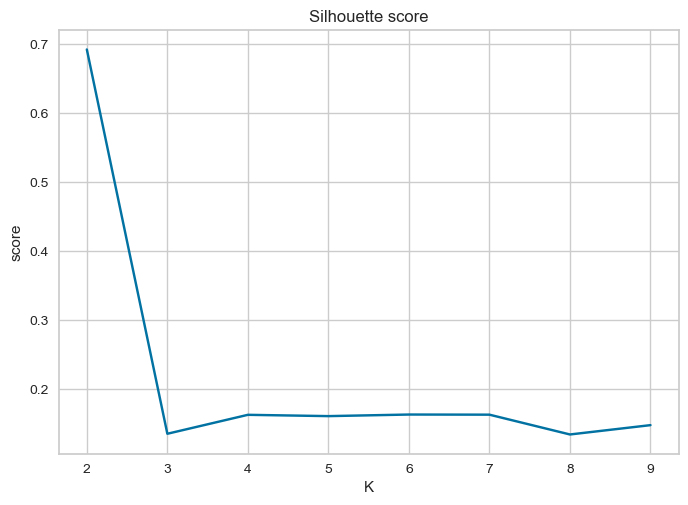

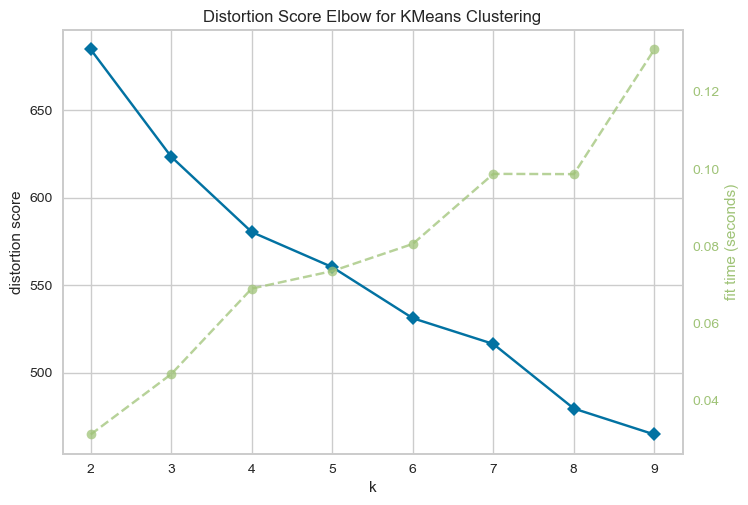

In [5]:
kmeans_report(pca_email_reduced)

In [6]:
pca_k_email=eval_km_cluster(5, pca_email_reduced, email_target)
email_rand_scores.append(pca_k_email)

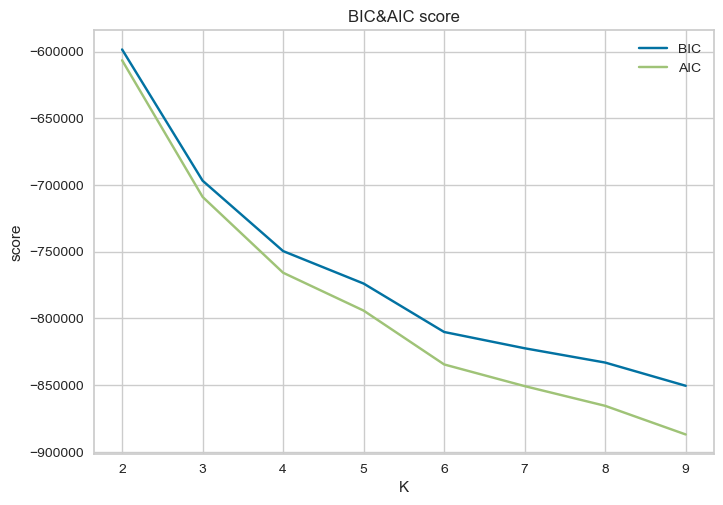

In [7]:
em_report(pca_email_reduced)

In [8]:
pca_em_email = eval_em_cluster(4,pca_email_reduced, email_target)
email_rand_scores.append(pca_em_email)

### Mobile

In [9]:
pca_mobile = PCA(n_components=15)
pca_mobile_reduced = pca_mobile.fit_transform(mobile_scaled_input)

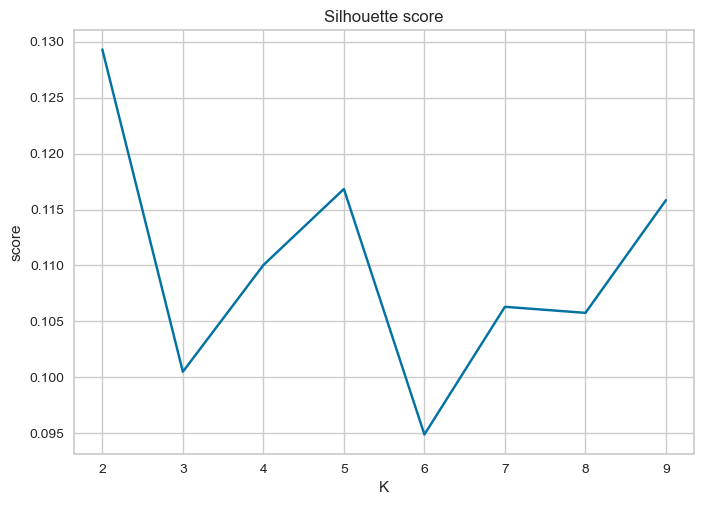

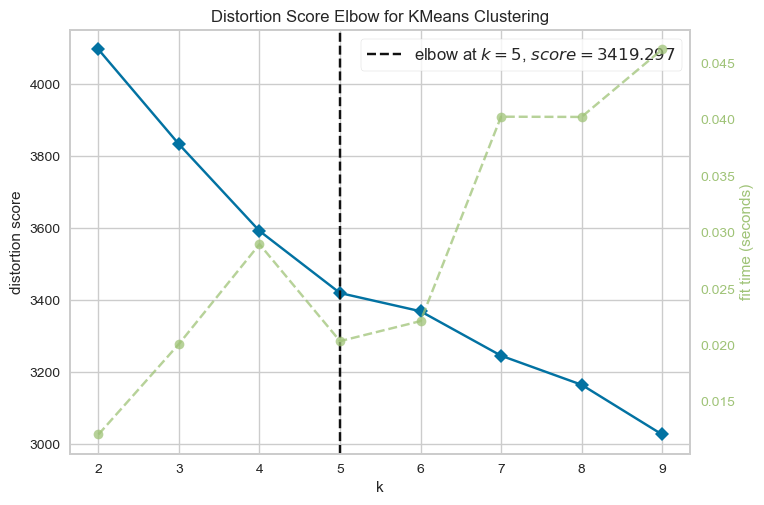

In [10]:
kmeans_report(pca_mobile_reduced)

In [11]:
pca_k_mobile = eval_km_cluster(5, pca_mobile_reduced, mobile_target)
mobile_rand_scores.append(pca_k_mobile)

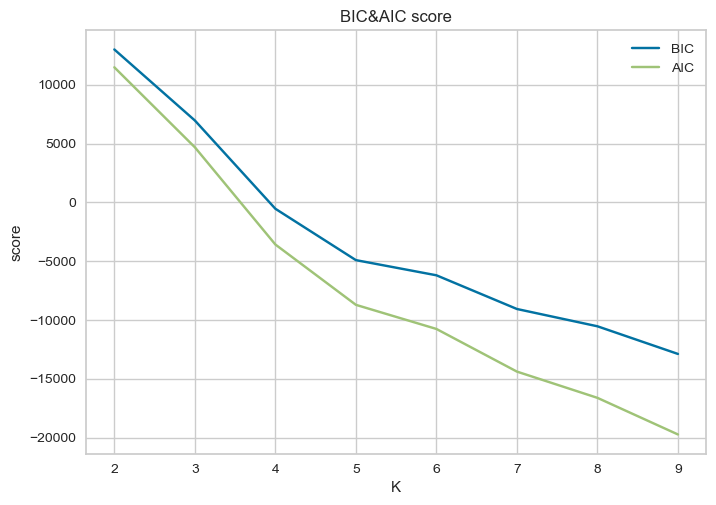

In [12]:
em_report(pca_mobile_reduced)

In [13]:
pca_em_mobile = eval_em_cluster(6, pca_mobile_reduced, mobile_target)
mobile_rand_scores.append(pca_em_mobile)

# ICA

### Email

In [14]:
ica_email = FastICA(n_components=35, whiten=True, random_state=42)
ica_email_reduced = ica_email.fit_transform(email_scaled_input)

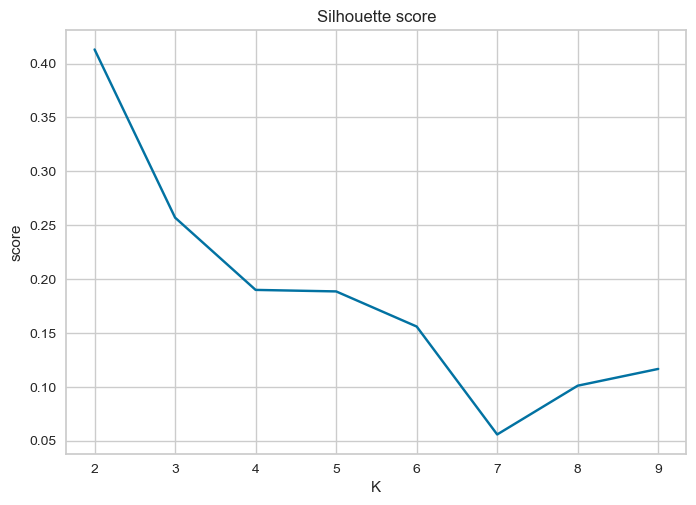

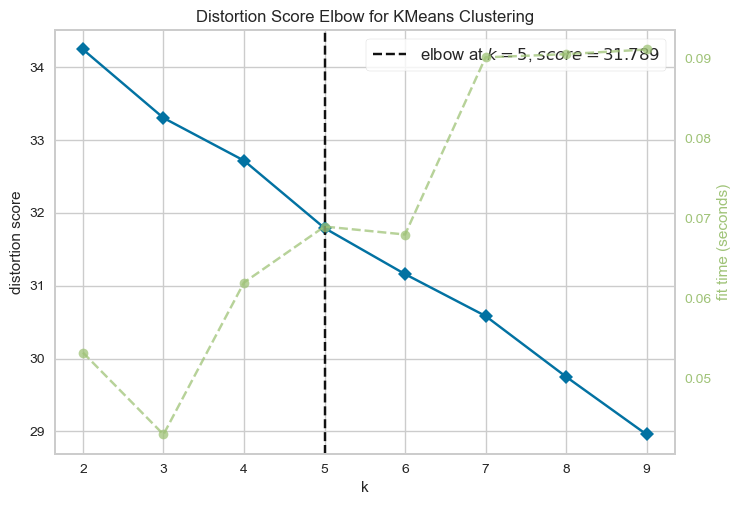

In [15]:
kmeans_report(ica_email_reduced)

In [16]:
ica_k_email = eval_km_cluster(4, ica_email_reduced, email_target)
email_rand_scores.append(ica_k_email)

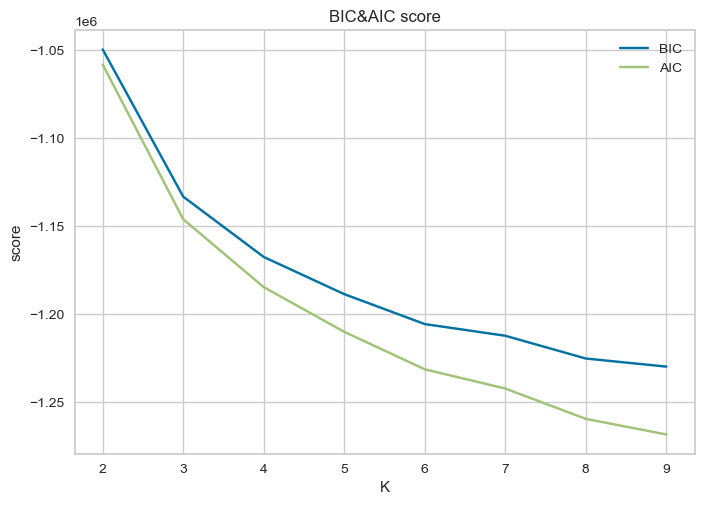

In [17]:
em_report(ica_email_reduced)

In [18]:
ica_em_email = eval_em_cluster(4, ica_email_reduced, email_target)
email_rand_scores.append(ica_em_email)

### Mobile

In [19]:
ica_mobile = FastICA(n_components=9, whiten=True, random_state=42)
ica_mobile_reduced = ica_mobile.fit_transform(mobile_scaled_input)

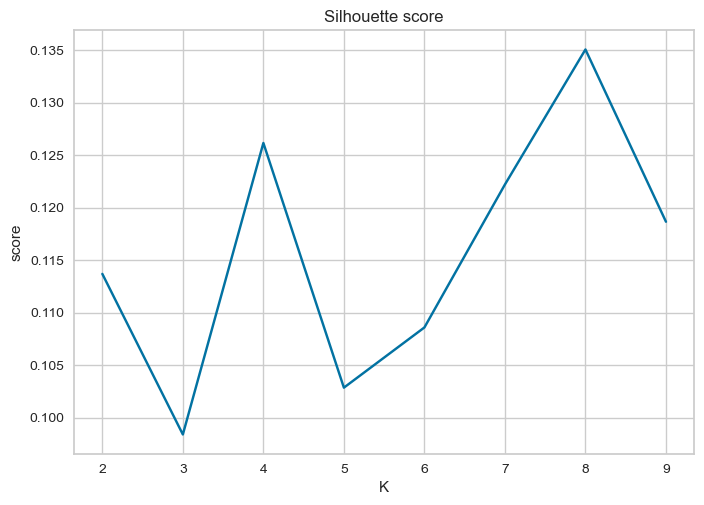

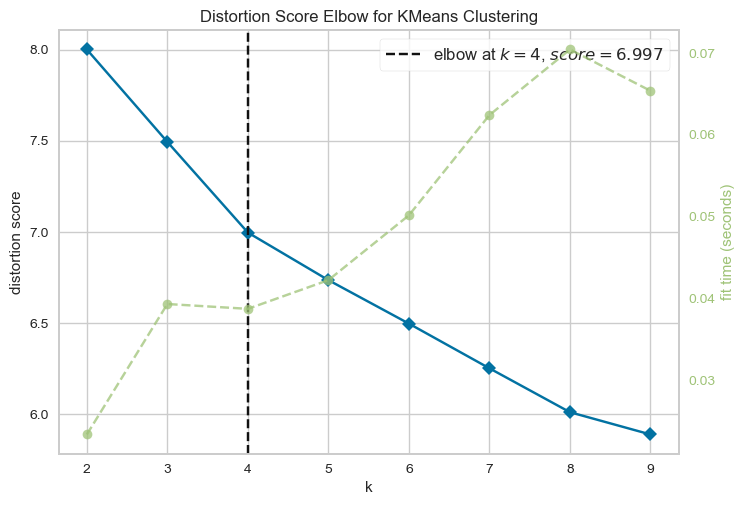

In [20]:
kmeans_report(ica_mobile_reduced)

In [21]:
ica_k_mobile = eval_km_cluster(4, ica_mobile_reduced, mobile_target)
mobile_rand_scores.append(ica_k_mobile)

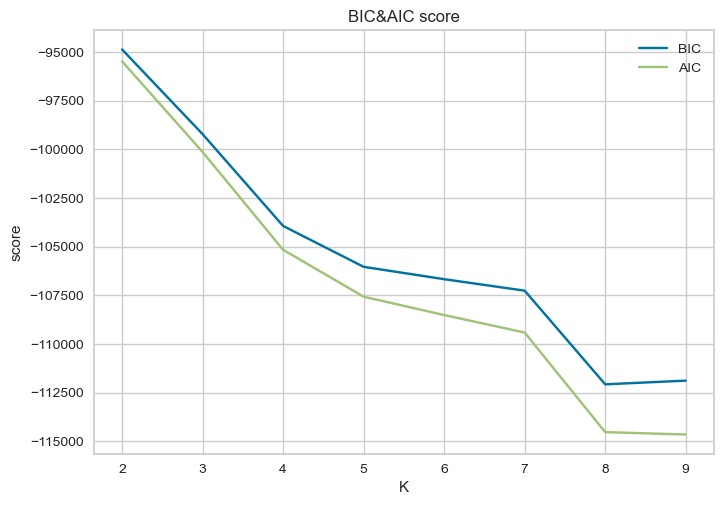

In [22]:
em_report(ica_mobile_reduced)

In [23]:
ica_em_mobile = eval_em_cluster(4, ica_mobile_reduced, mobile_target)
mobile_rand_scores.append(ica_em_mobile)

# Randomized Projections

### Email

In [24]:
rp_email = GaussianRandomProjection(n_components=5, random_state=42)
rp_email_reduced = rp_email.fit_transform(email_scaled_input)

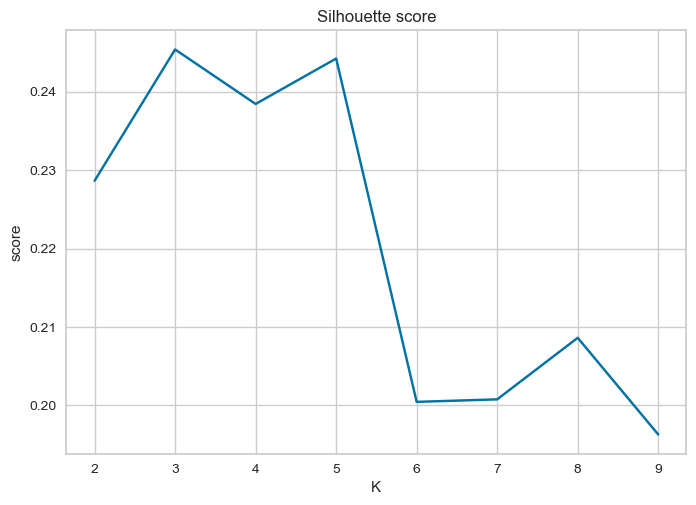

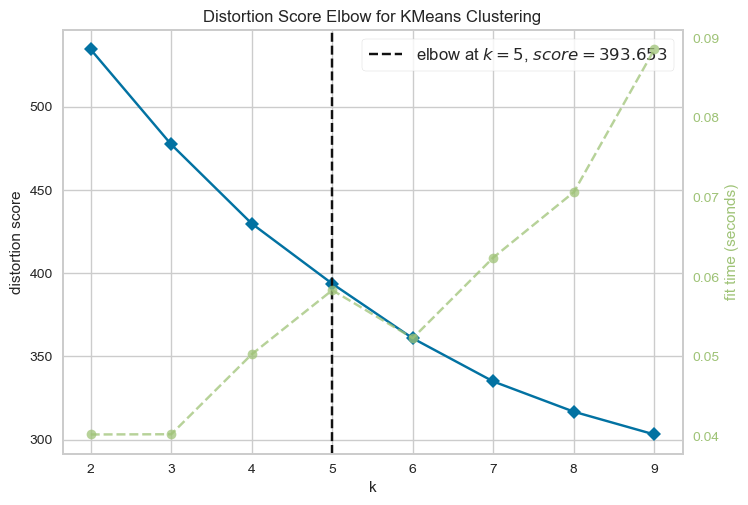

In [25]:
kmeans_report(rp_email_reduced)

In [26]:
rp_k_email = eval_km_cluster(5, rp_email_reduced,email_target)
email_rand_scores.append(rp_k_email)

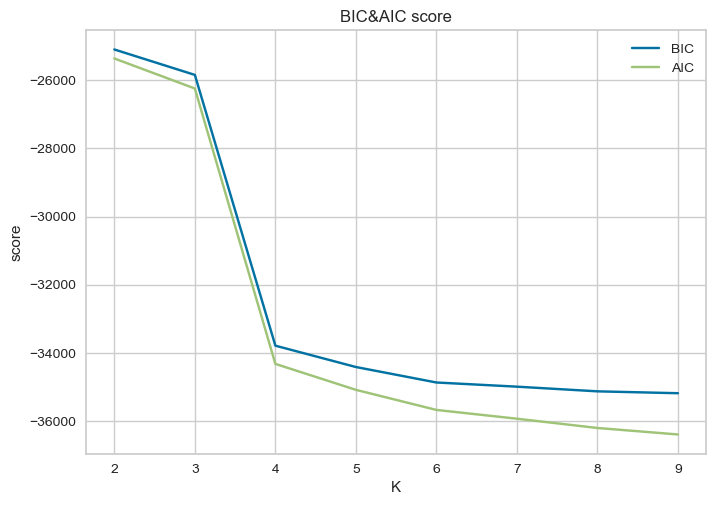

In [27]:
em_report(rp_email_reduced)

In [28]:
rp_em_email = eval_em_cluster(5, rp_email_reduced,email_target)
email_rand_scores.append(rp_em_email)

### Mobile

In [29]:
rp_mobile = GaussianRandomProjection(n_components=11, random_state=42)
rp_mobile_reduced = rp_mobile.fit_transform(mobile_scaled_input)

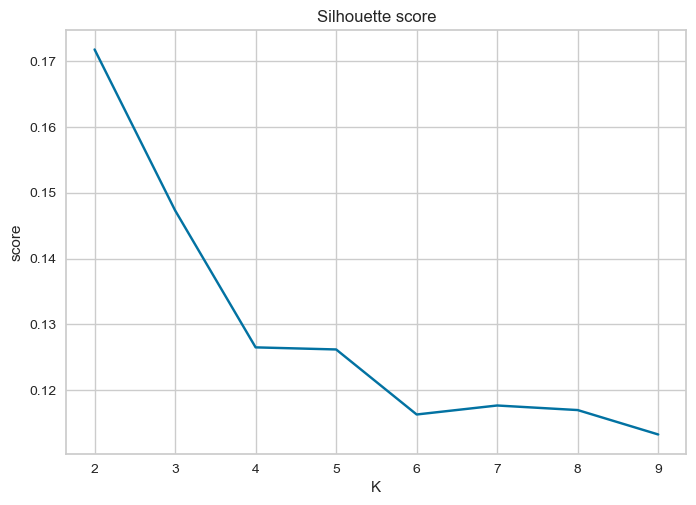

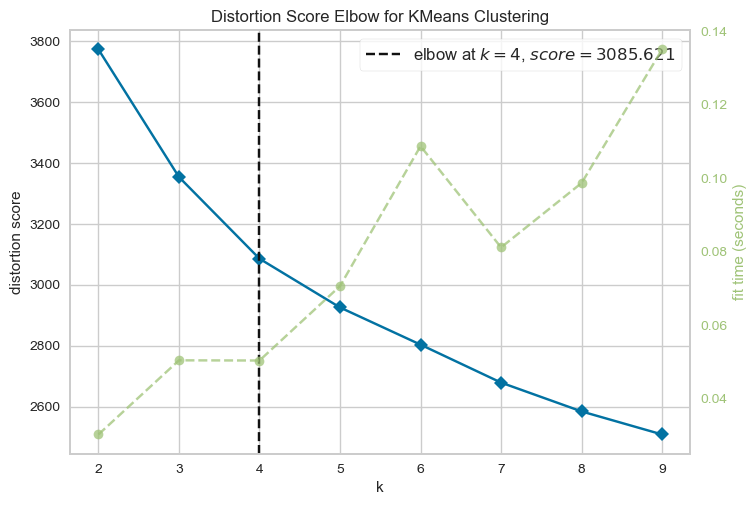

In [30]:
kmeans_report(rp_mobile_reduced)

In [31]:
rp_k_mobile = eval_km_cluster(4, rp_mobile_reduced,mobile_target)
mobile_rand_scores.append(rp_k_mobile)

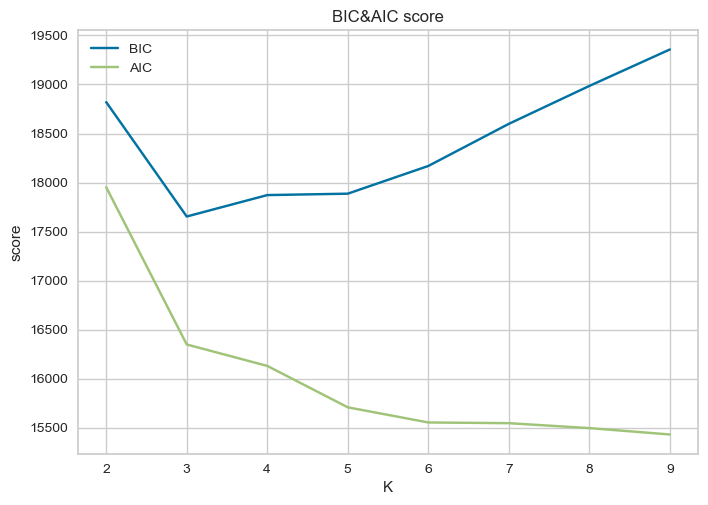

In [32]:
em_report(rp_mobile_reduced)

In [33]:
rp_em_mobile = eval_em_cluster(3, rp_mobile_reduced, mobile_target)
mobile_rand_scores.append(rp_em_mobile)

# Feature Selection : DecisionTree Classifier

### Email

In [34]:
clf = DecisionTreeClassifier()
trans = SelectFromModel(clf, threshold='median')
email_trans = trans.fit_transform(email_scaled_input, email_target)

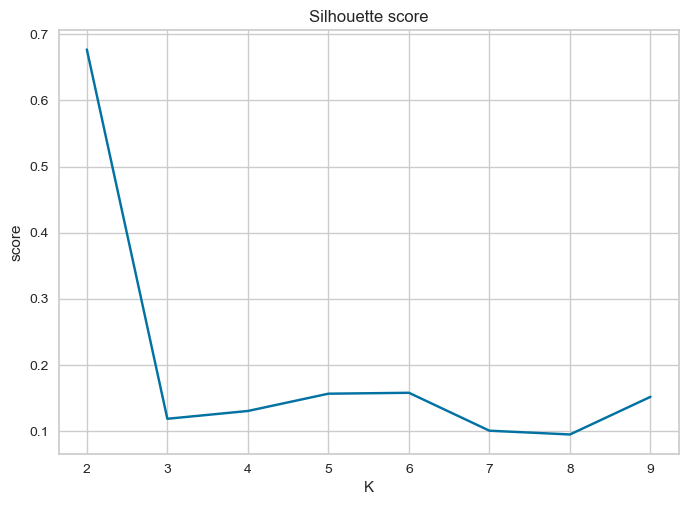

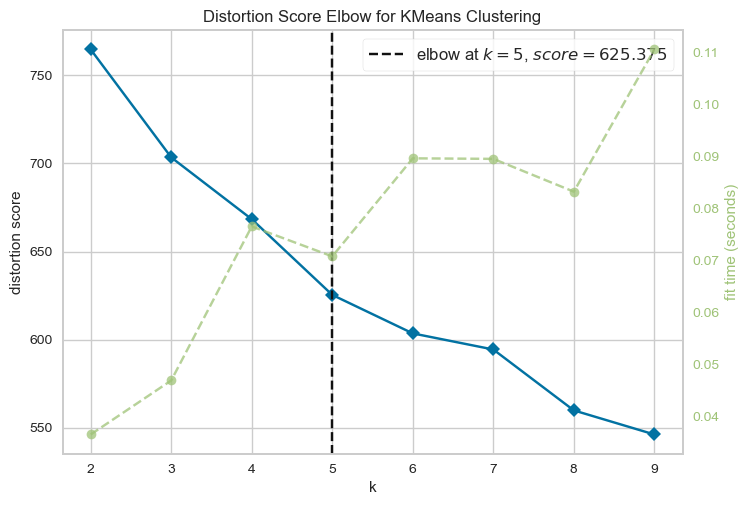

In [35]:
kmeans_report(email_scaled_input)

In [36]:
fs_k_email = eval_km_cluster(5, email_trans, email_target)
email_rand_scores.append(fs_k_email)

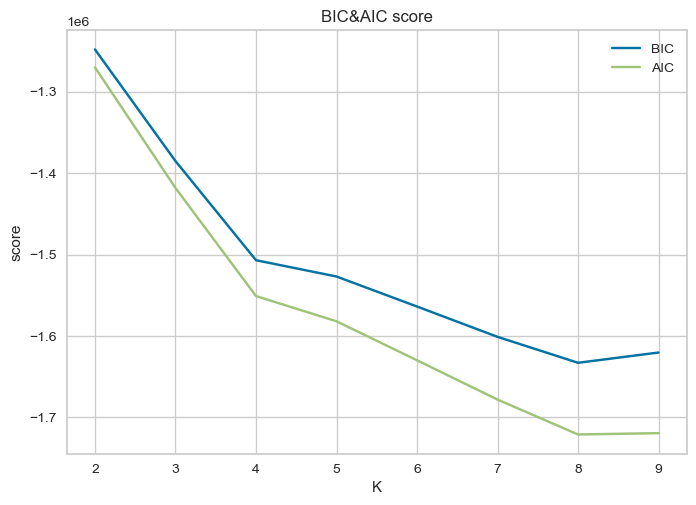

In [37]:
em_report(email_scaled_input)

In [38]:
fs_em_email = eval_em_cluster(7, email_trans, email_target)
email_rand_scores.append(fs_em_email)

### Mobile

In [39]:
mobile_clf = DecisionTreeClassifier()
trans = SelectFromModel(clf, threshold='median')
mobile_trans = trans.fit_transform(mobile_scaled_input, mobile_target)

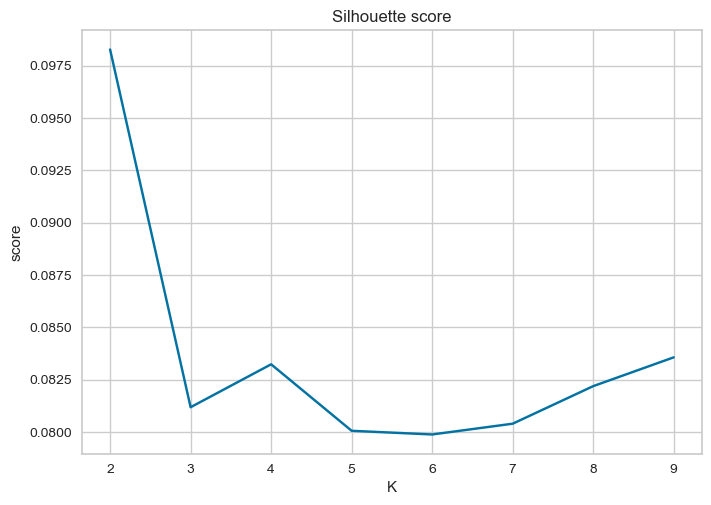

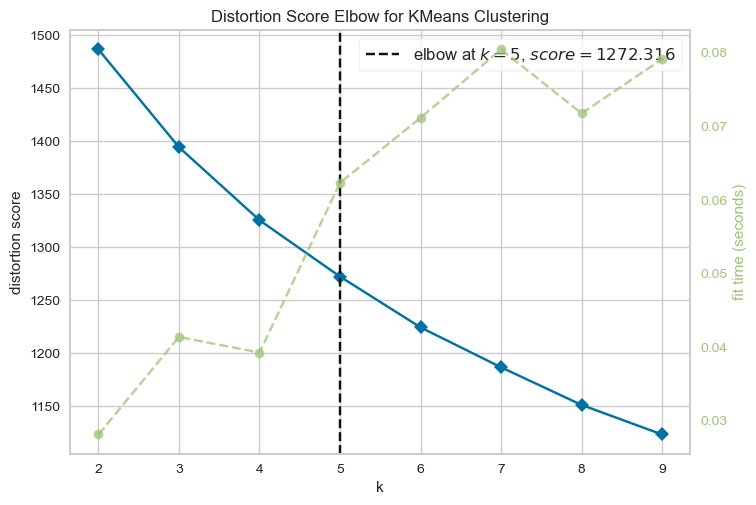

In [40]:
kmeans_report(mobile_trans)

In [41]:
fs_k_mobile = eval_km_cluster(5, mobile_trans, mobile_target)
mobile_rand_scores.append(fs_k_mobile)

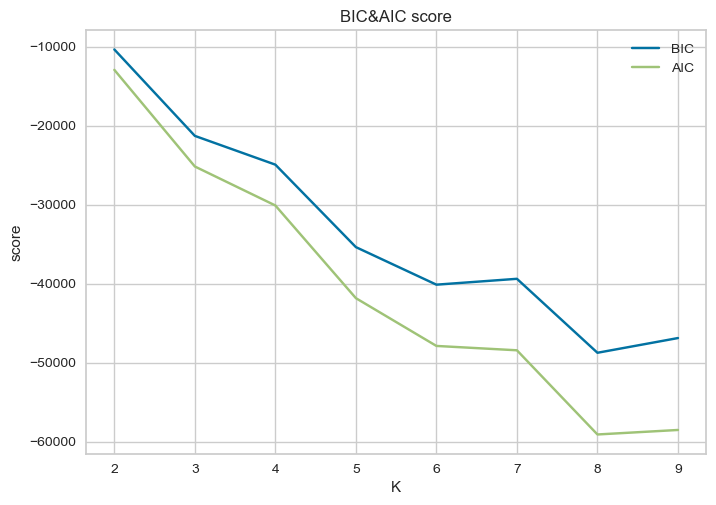

In [42]:
em_report(mobile_scaled_input)

In [43]:
fs_em_mobile = eval_em_cluster(7, mobile_trans, mobile_target)
mobile_rand_scores.append(fs_em_mobile)

In [73]:
email_rand_scores=[0.65,0.57] + email_rand_scores
mobile_rand_scores = [0.65,0.63]+mobile_rand_scores

# Cluster after Dimension Reduction analysys

### Email

<function matplotlib.pyplot.show(close=None, block=None)>

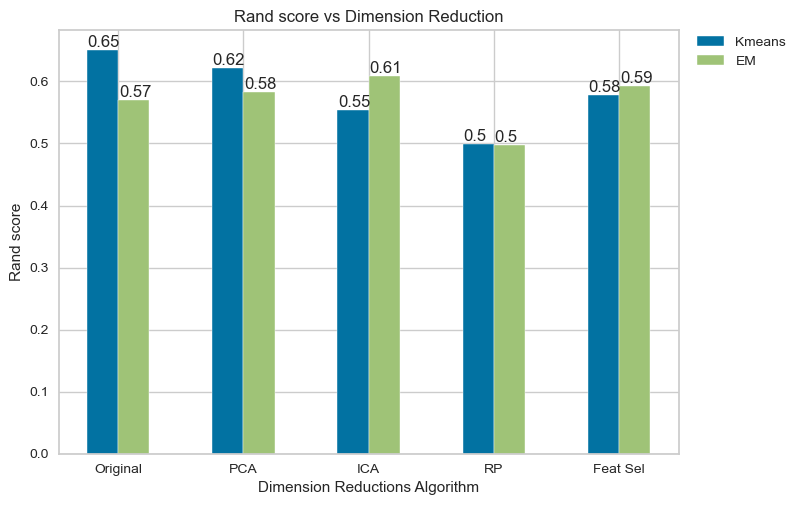

In [87]:
x_label = ['Original','PCA','ICA','RP', 'Feat Sel']
ind = np.arange(len(x_label) )
width = 0.25
plt.figure()
plt.bar(ind, email_rand_scores[0::2], width, label='Kmeans')
plt.bar(ind + width, email_rand_scores[1::2], width,label='EM')
for i, v in enumerate(email_rand_scores[0::2]):
    plt.text(i-0.12, v+0.005 ,str(round(v,2)))
for i, v in enumerate(email_rand_scores[1::2]):
    plt.text(i+width-0.12, v+0.005 ,str(round(v,2)))
plt.xlabel('Dimension Reductions Algorithm')
plt.ylabel('Rand score')
plt.title('Rand score vs Dimension Reduction')
plt.xticks([(width/2 + w) for w in range(len(ind)) ],  x_label)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show

### Mobile

<function matplotlib.pyplot.show(close=None, block=None)>

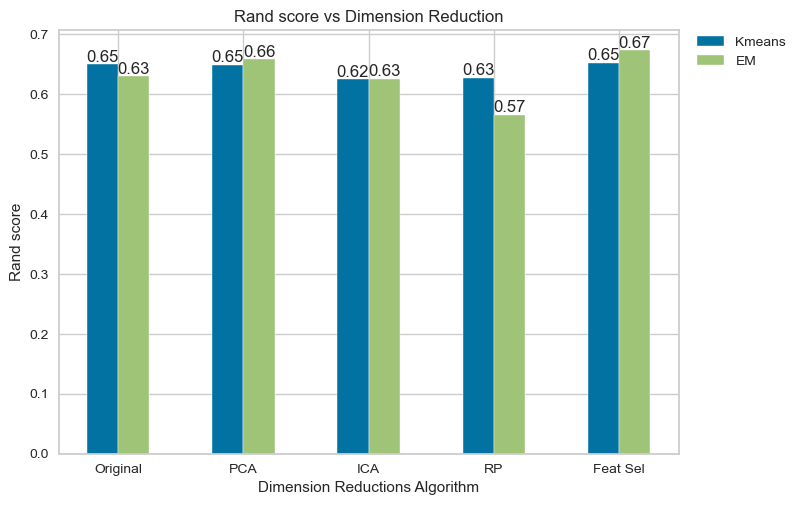

In [90]:
x_label = ['Original','PCA','ICA','RP', 'Feat Sel']
ind = np.arange(len(x_label) )
width = 0.25
plt.figure()
plt.bar(ind, mobile_rand_scores[0::2], width, label='Kmeans')
plt.bar(ind + width, mobile_rand_scores[1::2], width,label='EM')
for i, v in enumerate(mobile_rand_scores[0::2]):
    plt.text(i-0.13, v+0.005 ,str(round(v,2)))
for i, v in enumerate(mobile_rand_scores[1::2]):
    plt.text(i+width-0.13, v+0.005 ,str(round(v,2)))
plt.xlabel('Dimension Reductions Algorithm')
plt.ylabel('Rand score')
plt.title('Rand score vs Dimension Reduction')
plt.xticks([(width/2 + w) for w in range(len(ind)) ],  x_label)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show